<a href="https://colab.research.google.com/github/RahulSuran/rahul/blob/main/customer_conversation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Conversion Prediction**


# **Problem Statement**
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

#**Features:**

*  age (numeric)
*   job : type of job
*   marital : marital status
*   educational_qual : education status
*   call_type : contact communication type
*   day: last contact day of the month (numeric)
*   mon: last contact month of year
*   dur: last contact duration, in seconds (numeric)
*   num_calls: number of contacts performed during this campaign and for this   client
*   prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


*   Output variable (desired target):
y - has the client subscribed to the insurance?



# importing libraries


In [1]:
#for data reading and manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# Reading data

In [2]:
#reading data from a .csv file to pandas DataFrame
df=pd.read_csv("/content/Customer Conversion Prediction - Customer Conversion Prediction (1).csv")

# **Basic Analysis**

In [3]:
# checking data size
df.shape

(45211, 11)

The data set has 45211 rows and 11 columns

In [4]:
#Fetching top 5 row in dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
#Fetching Bottom 5 rows
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [6]:
# column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [7]:
#Basic statistical analysis of dataset
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [8]:
# checking information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
#checking for the data is balanced or not
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

From the above result it is imbalanced data set

# **Data cleaning**

In [10]:
# checking for null values
pd.DataFrame(df.isnull().sum()).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0,0,0,0,0,0,0,0,0,0,0


From the above result no null values found

In [11]:
#checking for no of duplicate values
df.duplicated().sum()

6

from the above result 6 duplicate values are found

In [12]:
#droping duplicates and cross-checking
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
# checking datatypes
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [14]:
# checking datatypes value count
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


In [15]:
# checking integer column names
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [16]:
# checking  categorical column names
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [17]:
# checking for categories in categorical columns
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.



In [18]:
# for column "job"
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
# for column "marital"
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [20]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [21]:
# for column "call_type"
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [22]:
# for column "mon"
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [23]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [24]:
# for column "y"
df['y'].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

From all the above results all values are unique , there is no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

# **Outlier detection and correction**

<Axes: xlabel='age'>

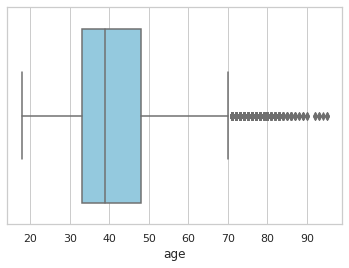

In [25]:
#Outlier Detuction using Box Plot for Age Column
sns.set(style="whitegrid")
sns.boxplot(x=df['age'], color='skyblue')

In [26]:
#detecting Outlier for Age column
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


In [27]:
#removing outlier for age column
df.age = df.age.clip(10.5,70.5)
df.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

<Axes: xlabel='day'>

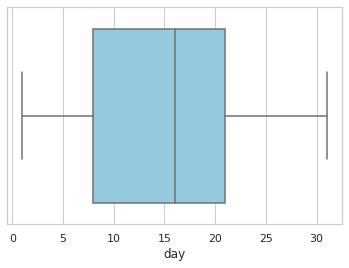

In [28]:
#Outlier Detuction using Box Plot for day Column
sns.set(style="whitegrid")
sns.boxplot(x=df['day'], color='skyblue')

<Axes: >

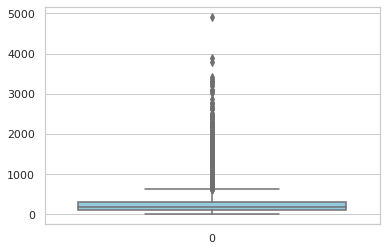

In [29]:
#Outlier Detuction using Box Plot for duration Column
sns.set(style="whitegrid")
sns.boxplot(df['dur'], color='skyblue')

In [30]:
#detecting Outlier for Duration column
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


In [31]:
#removing outlier for duration column
df.dur = df.dur.clip(-221.0,643.0)
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

<Axes: >

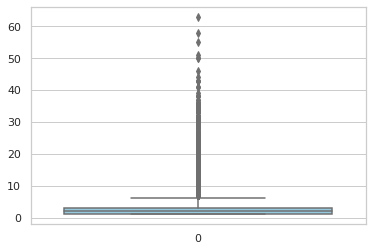

In [32]:
#checking for outlier using boxplot fot the column no of calls
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'], color='skyblue')

In [33]:
#detecting Outlier for number of calls column
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [34]:
#removing outlier for num_calls column
df.num_calls = df.num_calls.clip(-2,6.0)
df.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

from the above process we have detucted and removed outlier for all numerical columns

In [35]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,no


# **Data Visualization**

# Diatribution of Features categorical 

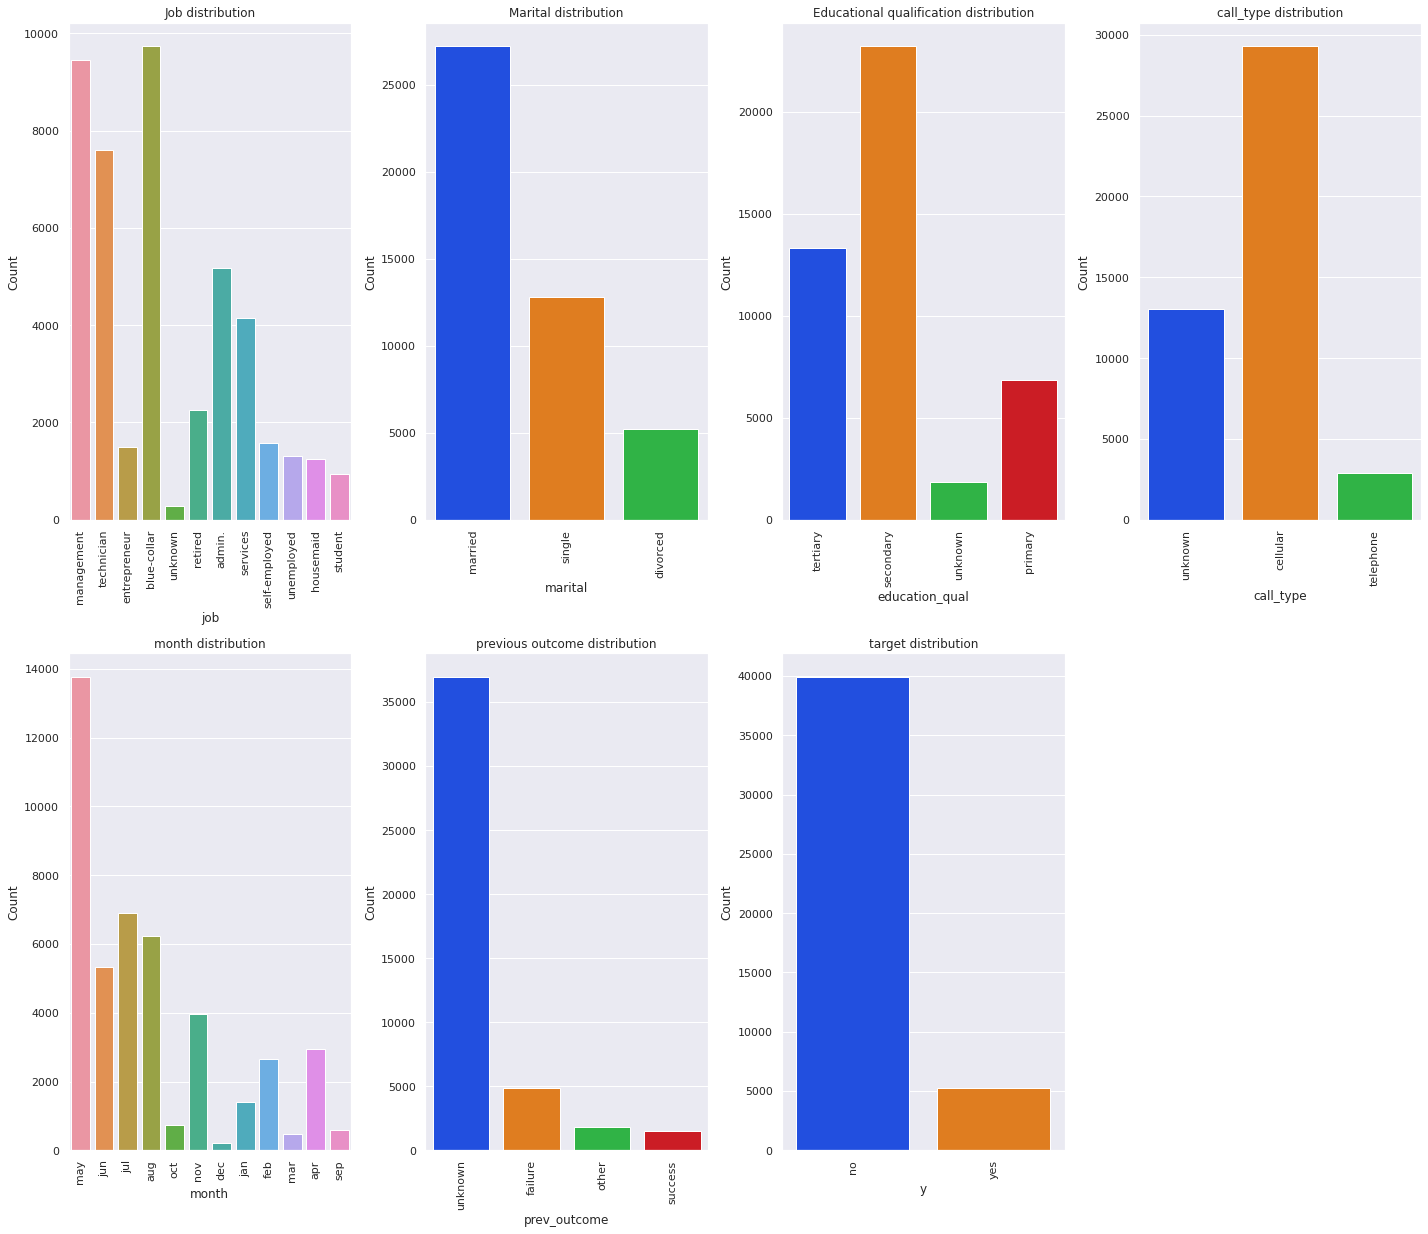

In [36]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='bright')

plt.figure(figsize=(20,25))
plt.subplot(3,4,1) 
sns.countplot(x='job',data=df) 
plt.xticks(rotation=90)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Job distribution')

plt.subplot(3,4,2) 
sns.countplot(x='marital',data=df)
plt.xticks(rotation=90)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Marital distribution')

plt.subplot(3,4,3) 
sns.countplot(x='education_qual',data=df)
plt.xticks(rotation=90)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Educational qualification distribution')

plt.subplot(3,4,4) 
sns.countplot(x='call_type',data=df)
plt.xticks(rotation=90)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('call_type distribution')

plt.subplot(3,4,5) 
sns.countplot(x='mon',data=df)
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('Count')
plt.title('month distribution')

plt.subplot(3,4,6) 
sns.countplot(x='prev_outcome',data=df)
plt.xticks(rotation=90)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('previous outcome distribution')

plt.subplot(3,4,7) 
sns.countplot(x='y',data=df)
plt.xticks(rotation=90)
plt.xlabel('y')
plt.ylabel('Count')
plt.title('target distribution')

plt.tight_layout()

# Distribution of features numerical

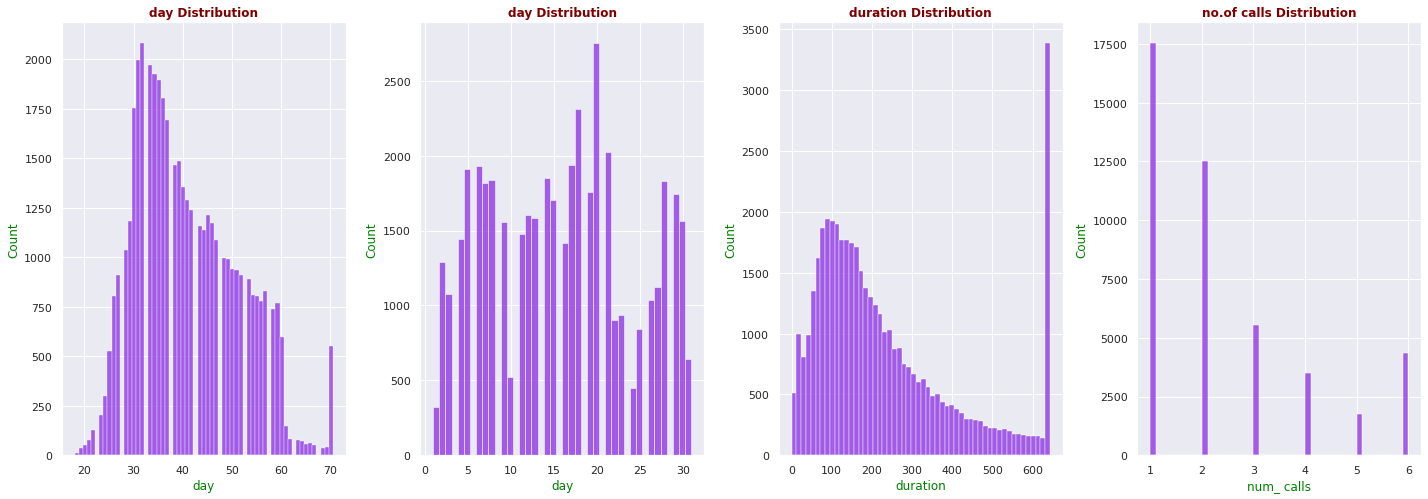

In [37]:
#plotting histplots for all the numerical columns
sns.set_theme(style='darkgrid')

plt.figure(figsize = (20,20))  
plt.subplot(3,4,1)
sns.histplot((df.age),color='BlueViolet') 
plt.title('day Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('day',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')  
 
plt.subplot(3,4,2)
sns.histplot((df.day),color='BlueViolet') 
plt.title('day Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('day',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')  

plt.subplot(3,4,3)
sns.histplot((df.dur),color='BlueViolet') 
plt.title('duration Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('duration',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')  

plt.subplot(3,4,4)
sns.histplot((df.num_calls),color='BlueViolet') 
plt.title('no.of calls Distribution', fontsize = 12, color='maroon', fontweight='bold') 
plt.xlabel('num_ calls',fontsize = 12, color='green') 
plt.ylabel('Count',fontsize = 12, color='green')  

plt.tight_layout()

# Categorical Variable vs Target (Categorical)

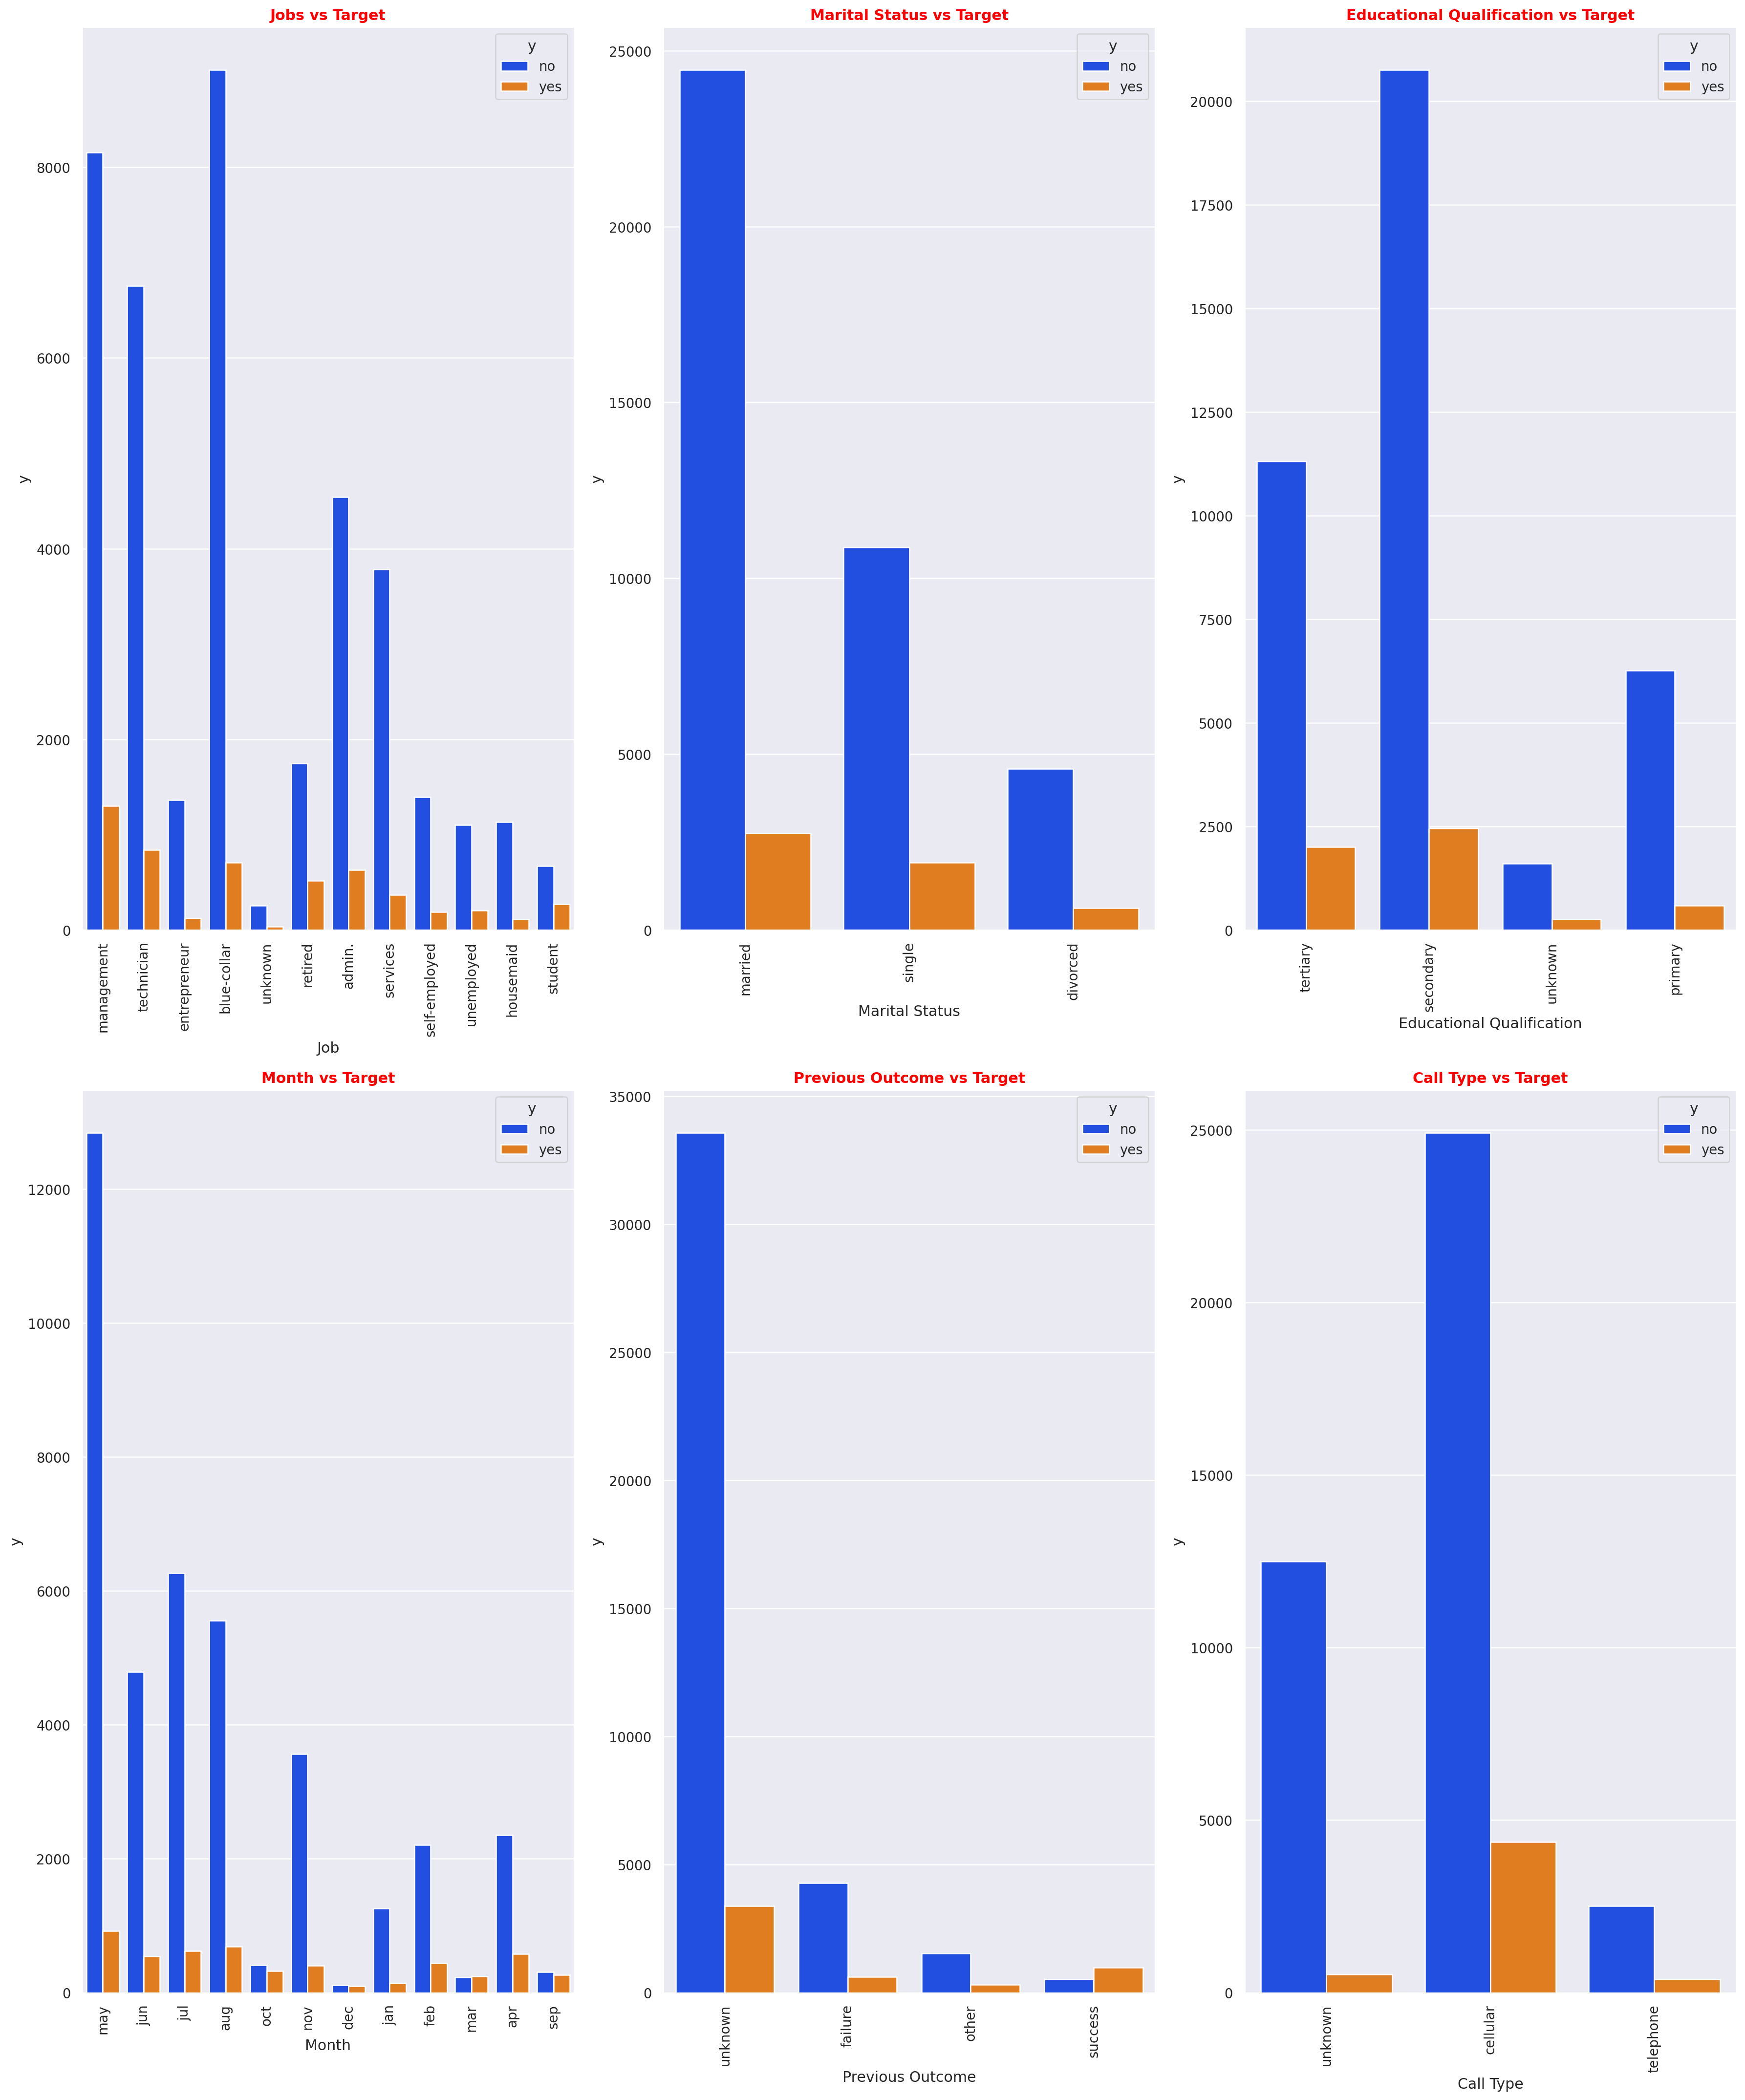

In [38]:
# plotting count plots for categorical vs target (categorical)
sns.set_theme(style='darkgrid',palette='bright')

plt.figure(figsize=(20,35), dpi=180)
plt.subplot(3,3,1)
sns.countplot(x='job',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Jobs vs Target', fontweight='bold', color='red')
plt.xlabel('Job')
plt.ylabel('y')

plt.subplot(3,3,2)
sns.countplot(x='marital',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Marital Status vs Target', fontweight='bold', color='red')
plt.xlabel('Marital Status')
plt.ylabel('y')

plt.subplot(3,3,3)
sns.countplot(x='education_qual',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Educational Qualification vs Target', fontweight='bold', color='red')
plt.xlabel('Educational Qualification')
plt.ylabel('y')

plt.subplot(3,3,4)
sns.countplot(x='mon',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Month vs Target', fontweight='bold', color='red' )
plt.xlabel('Month')
plt.ylabel('y')

plt.subplot(3,3,5)
sns.countplot(x='prev_outcome',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Previous Outcome vs Target', fontweight='bold', color='red' )
plt.xlabel('Previous Outcome')
plt.ylabel('y',)

plt.subplot(3,3,6)
sns.countplot(x='call_type',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Call Type vs Target', fontweight='bold', color='red')
plt.xlabel('Call Type',)
plt.ylabel('y',)

plt.tight_layout()
plt.show()

# Numerical Variable vs Target (Categorical)

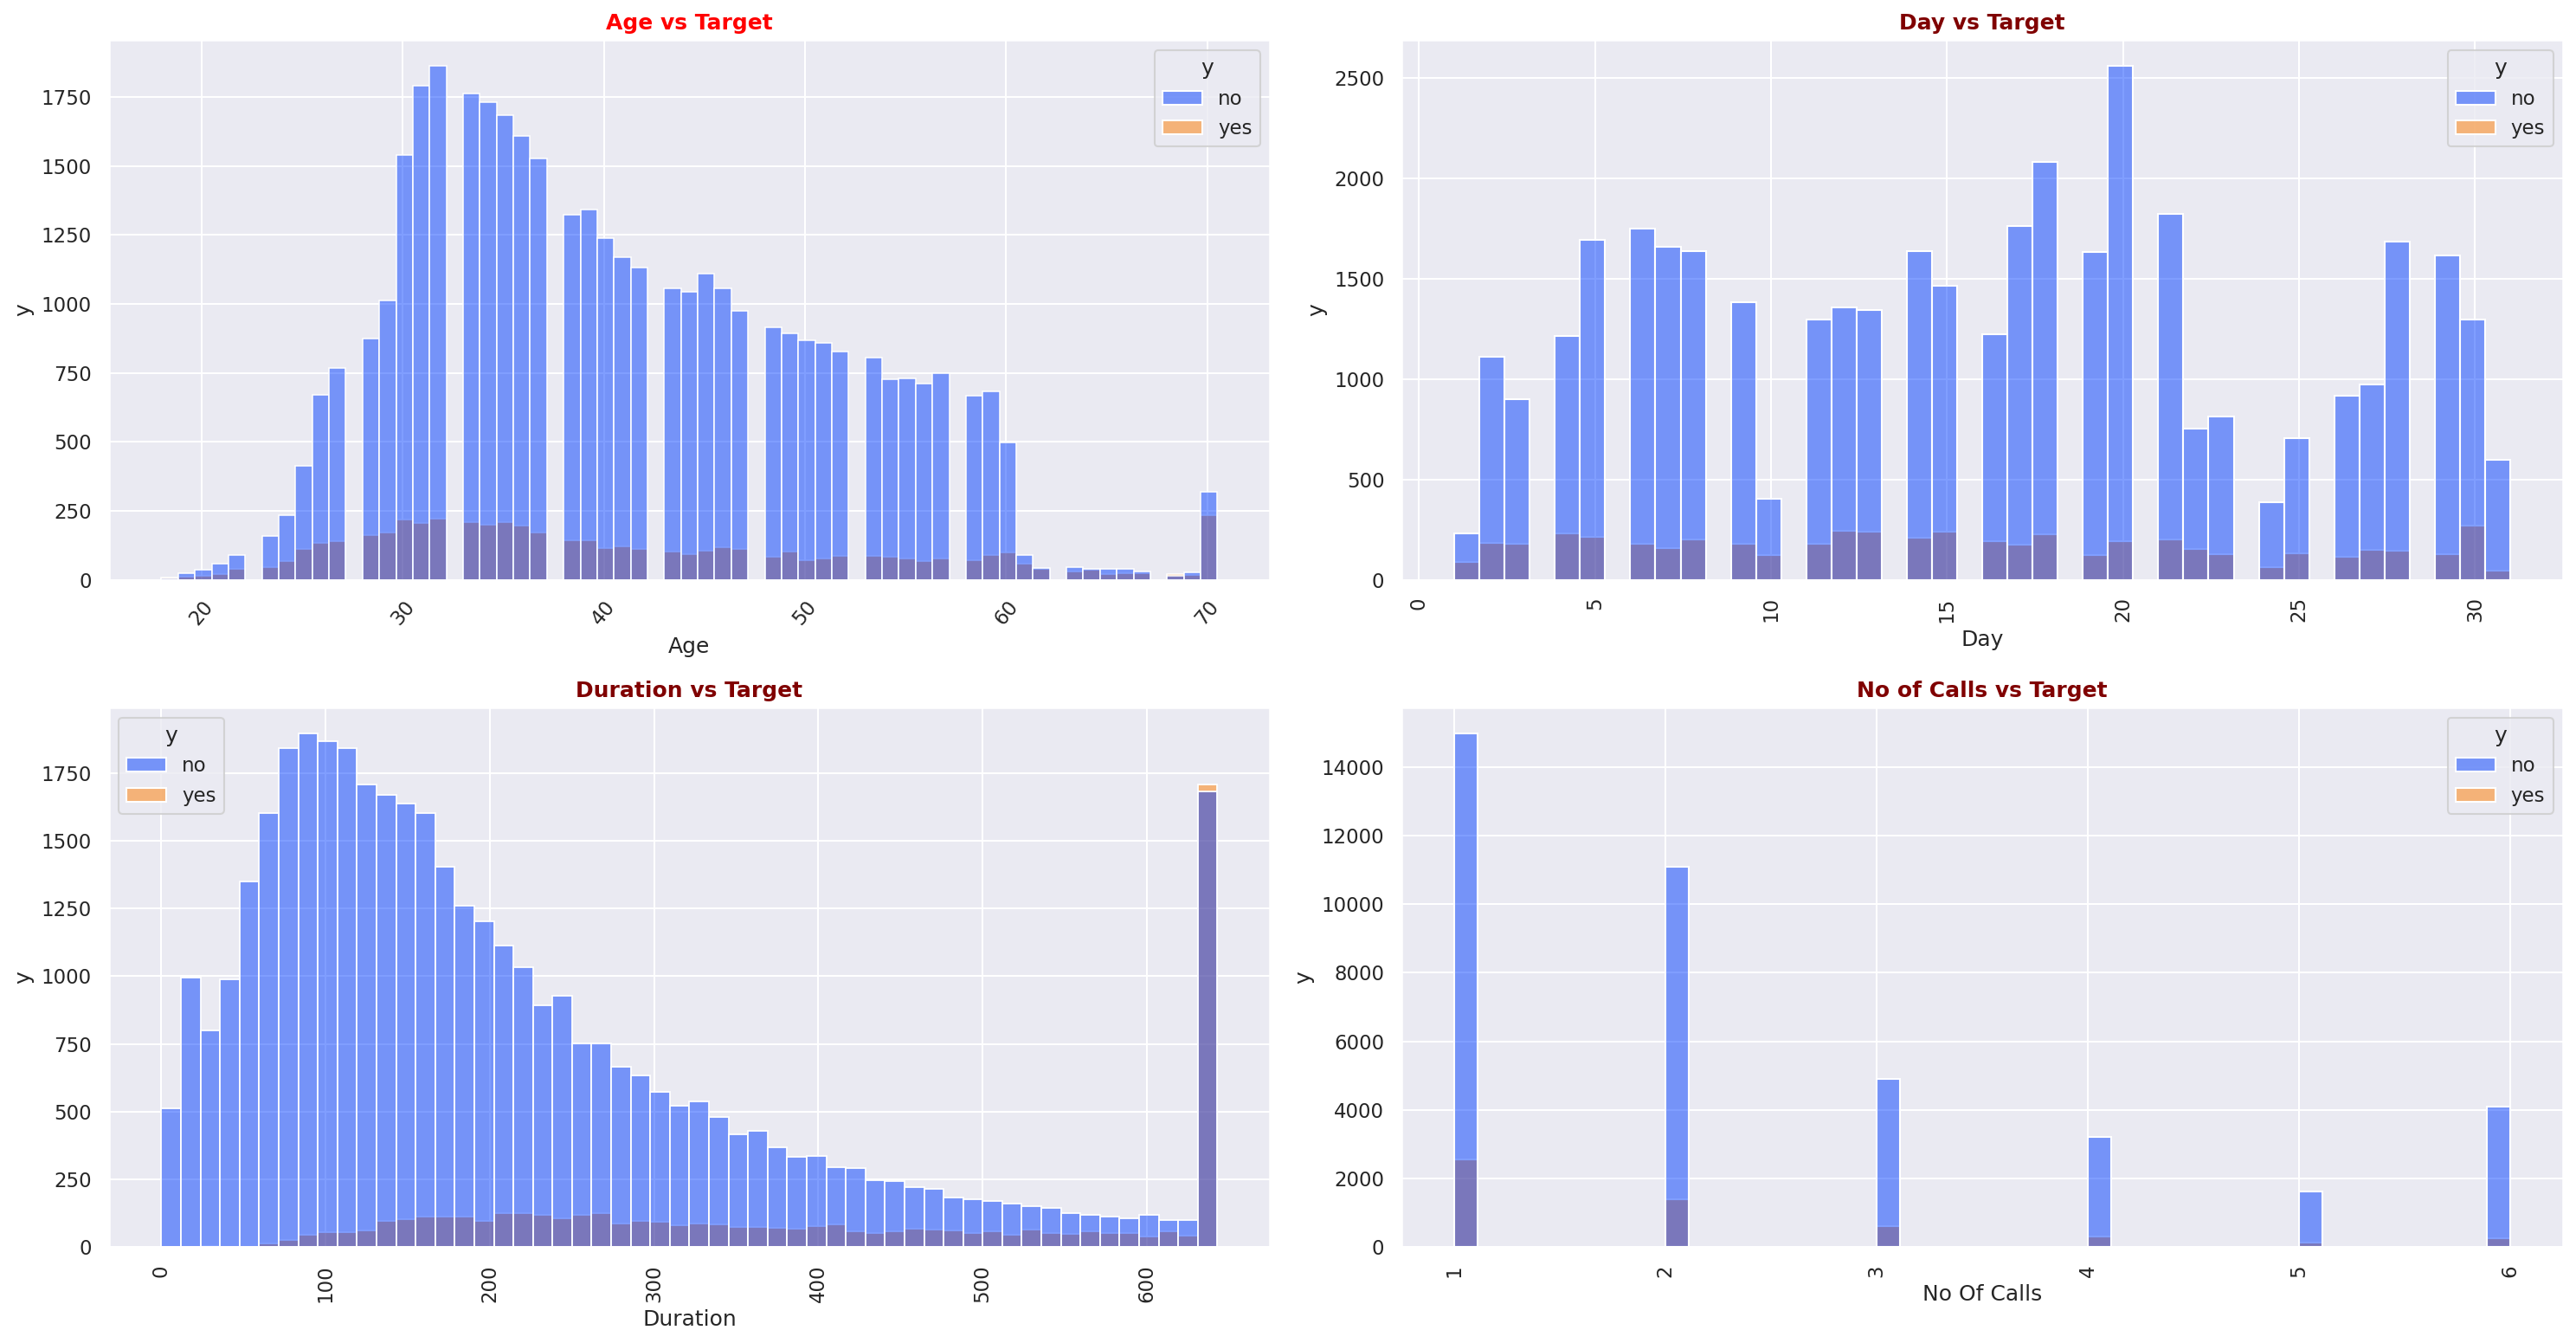

In [39]:
# plotting histplots for numerical variable vs target
sns.set_theme(style='darkgrid',palette='bright')

plt.figure(figsize=(20, 15), dpi=150)
plt.subplot(3,2,1)
sns.histplot(x='age',hue='y',data=df)
plt.xticks(rotation=50)
plt.title('Age vs Target', fontweight='bold', color='red' )
plt.xlabel('Age',)
plt.ylabel('y',)

plt.subplot(3,2,2)
sns.histplot(x='day',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Day vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Day')
plt.ylabel('y')

plt.subplot(3,2,3)
sns.histplot(x='dur',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('Duration vs Target', fontweight='bold', color='maroon' )
plt.xlabel('Duration')
plt.ylabel('y')

plt.subplot(3,2,4)
sns.histplot(x='num_calls',hue='y',data=df)
plt.xticks(rotation=90)
plt.title('No of Calls vs Target', fontweight='bold', color='maroon' )
plt.xlabel('No Of Calls')
plt.ylabel('y')

plt.tight_layout()
plt.show()


**Converting categorical column (y) into numerical column (y)**

In [40]:
df['y'] = df['y'].map({"yes":1 , "no": 0})

In [41]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,0
1,44.0,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,0
2,33.0,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,0
3,47.0,blue-collar,married,unknown,unknown,5,may,92.0,1.0,unknown,0
4,33.0,unknown,single,unknown,unknown,5,may,198.0,1.0,unknown,0


# **percentage of features categorical vs target**

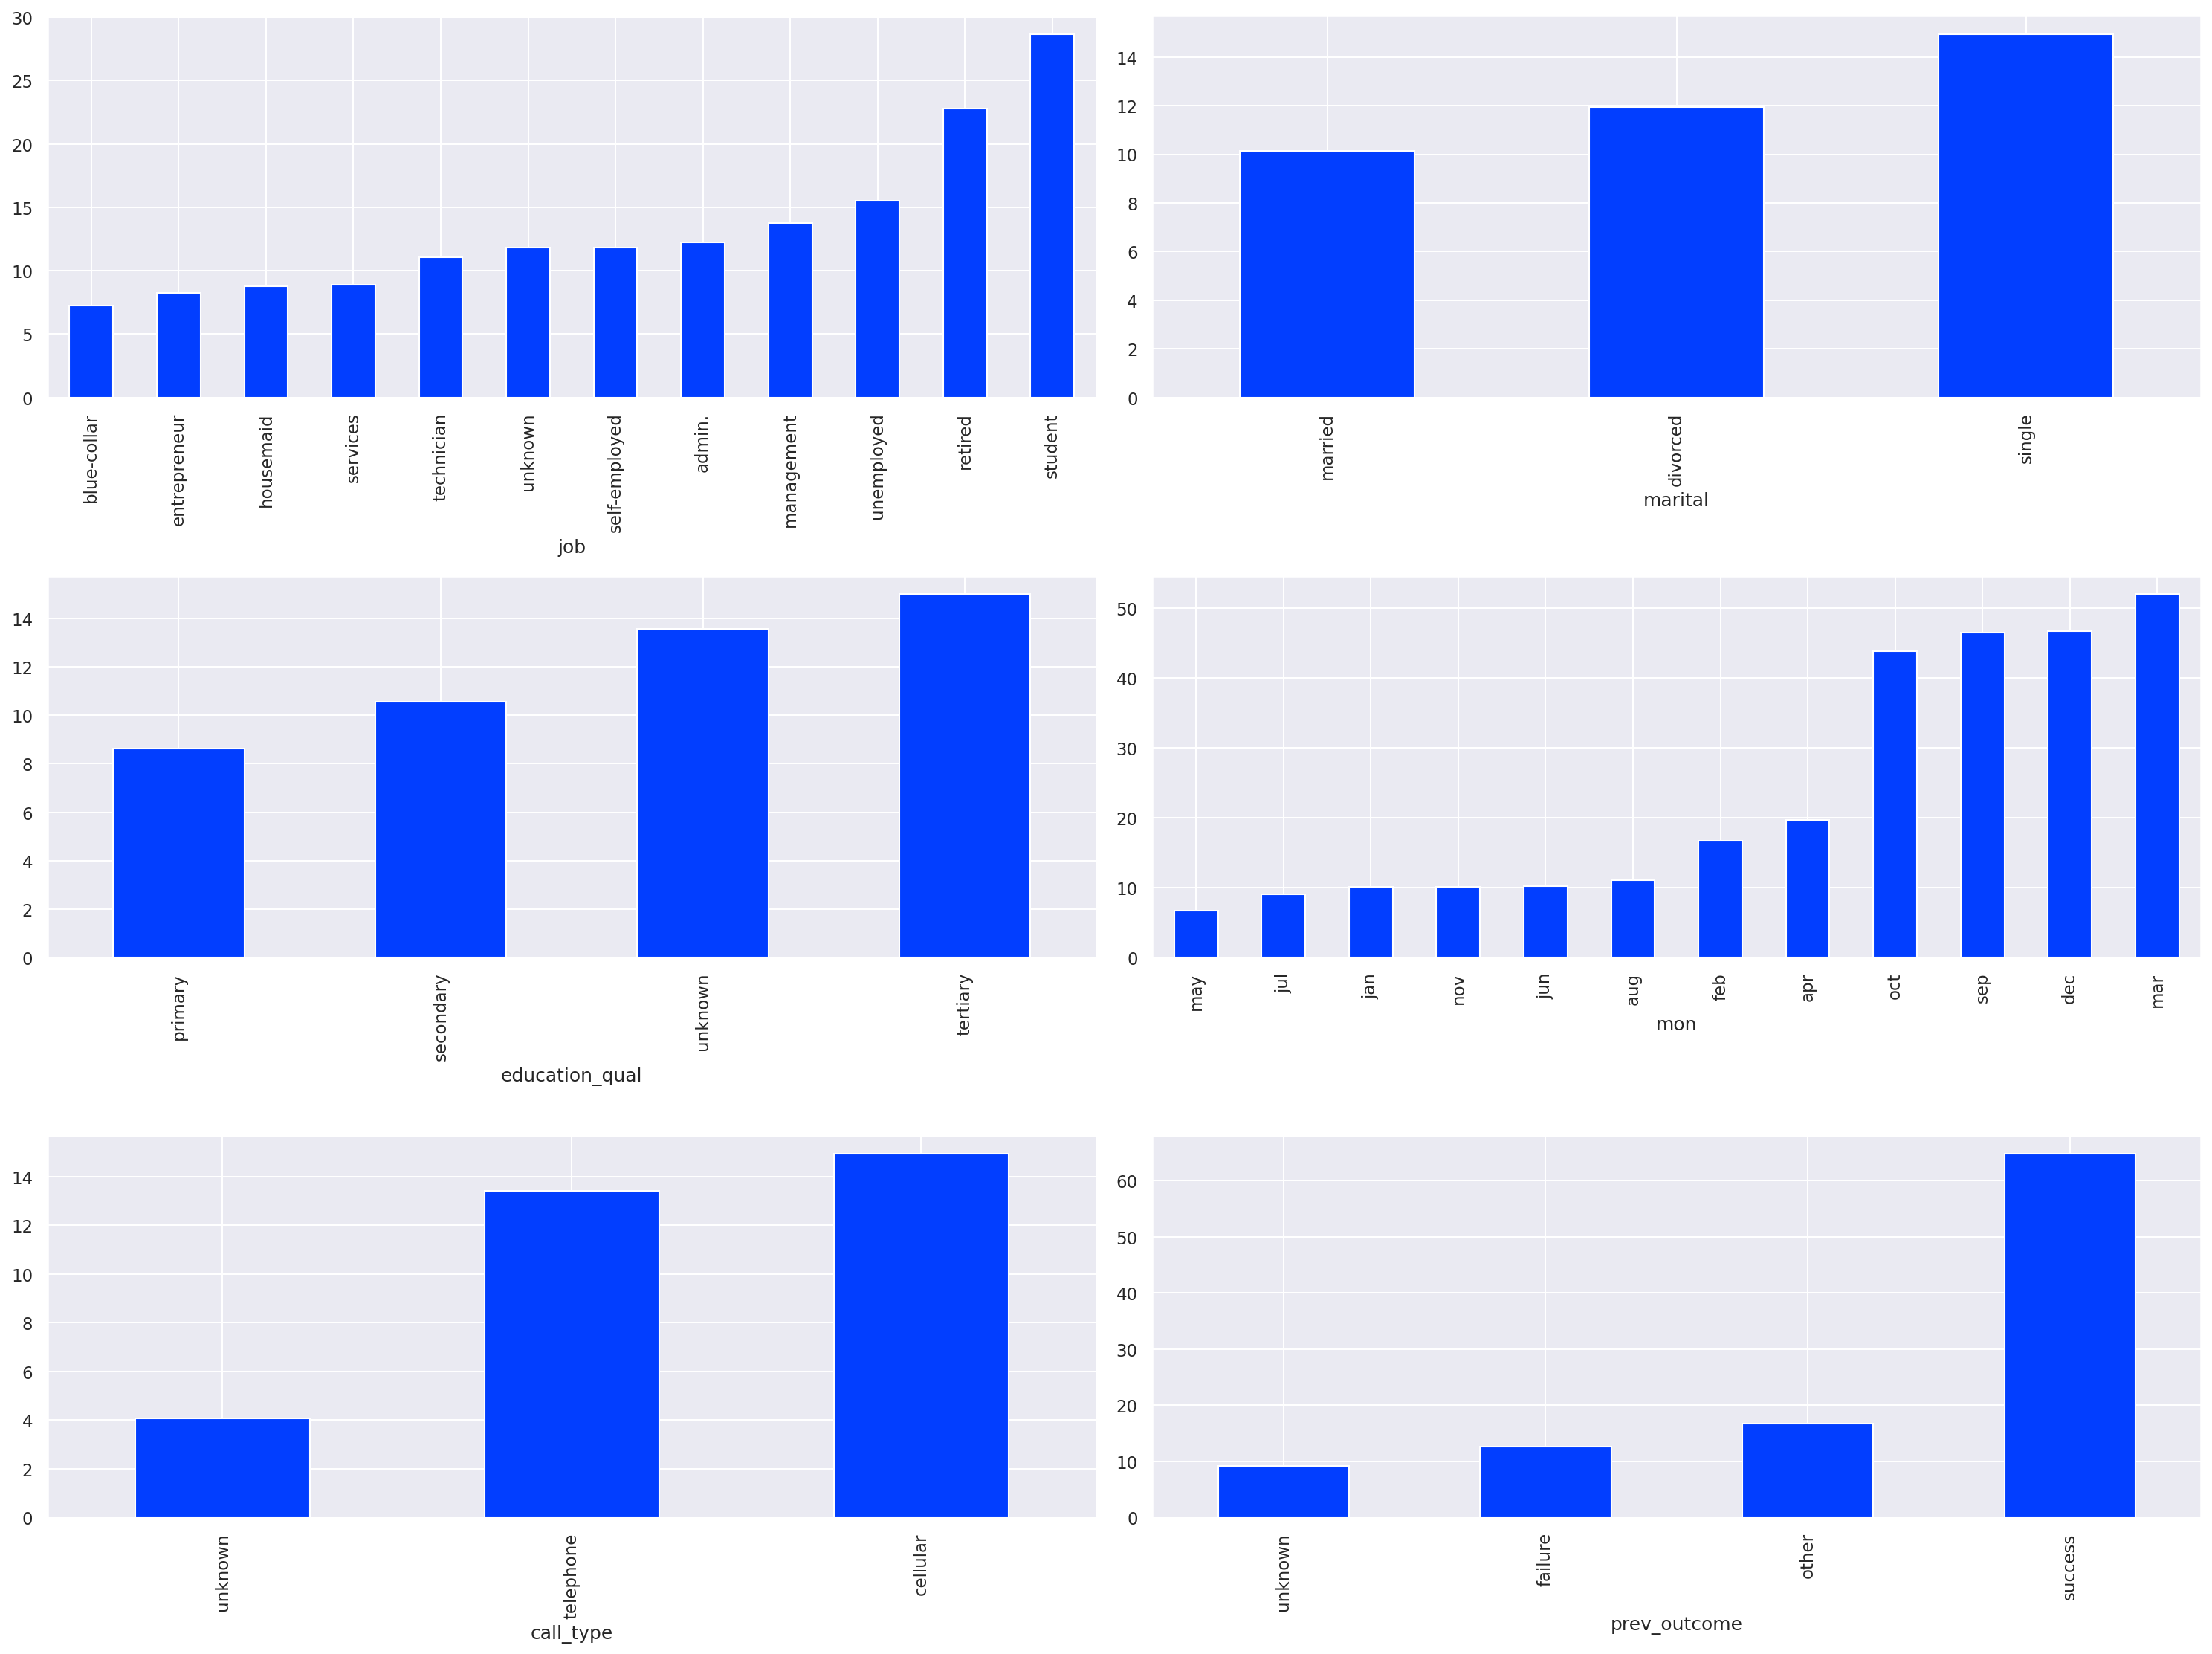

In [42]:
sns.set_theme(style='darkgrid',palette='bright')

plt.figure(figsize=(20, 15), dpi=150)
plt.subplot(321)
(df.groupby('job')['y'].mean()*100).sort_values().plot(kind="bar")

plt.subplot(322)
(df.groupby('marital')['y'].mean()*100).sort_values().plot(kind="bar")

plt.subplot(323)
(df.groupby('education_qual')['y'].mean()*100).sort_values().plot(kind="bar")

plt.subplot(324)
(df.groupby('mon')['y'].mean()*100).sort_values().plot(kind="bar")

plt.subplot(325)
(df.groupby('call_type')['y'].mean()*100).sort_values().plot(kind="bar")

plt.subplot(326)
(df.groupby('prev_outcome')['y'].mean()*100).sort_values().plot(kind="bar")

plt.tight_layout()

# **Encoding categorical variables**

In [43]:
# using label encoding for converting all categorical column into numerical column
df['job']=df['job'].map({'blue-collar':1,'entrepreneur':2,'services':3,'housemaid':4,'technician':5,'unknown':6,'self-employed':7,'admin.':8,'management':9, 'unemployed':10, 'retired': 11, 'student' : 12})   
df['marital'] =df['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
df['education_qual'] = df['education_qual'].map({'primary': 1, 'secondary': 2, 'unknown':3,'tertiary' :4})
df['mon']=df['mon'].map({'may': 1, 'jul' : 2, 'jan': 3, 'nov': 4, 'jun' : 5, 'aug' : 6, 'feb' : 7, 'apr' : 8, 'oct' : 9, 'dec' : 10 , 'sep': 11, 'mar': 12})
df['call_type'] = df['call_type'].map({'unknown': 1, 'telephone' : 2, 'cellular' : 3})
df['prev_outcome']=df['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success': 4})

df.head()


,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,9,1,4,1,5,1,261.0,1.0,1,0
1,44.0,5,3,2,1,5,1,151.0,1.0,1,0
2,33.0,2,1,2,1,5,1,76.0,1.0,1,0
3,47.0,1,1,3,1,5,1,92.0,1.0,1,0
4,33.0,6,3,3,1,5,1,198.0,1.0,1,0


 **Splitting the data into input data and output data**


In [44]:
def split(dataframe):
  x = dataframe.drop('y',axis=1)
  y = dataframe['y']
  return x,y

In [45]:
x, y = split(df)

In [46]:
x

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
0,58.0,9,1,4,1,5,1,261.0,1.0,1
1,44.0,5,3,2,1,5,1,151.0,1.0,1
2,33.0,2,1,2,1,5,1,76.0,1.0,1
3,47.0,1,1,3,1,5,1,92.0,1.0,1
4,33.0,6,3,3,1,5,1,198.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,5,1,4,3,17,4,643.0,3.0,1
45207,70.5,11,2,1,3,17,4,456.0,2.0,1
45208,70.5,11,1,2,3,17,4,643.0,5.0,4
45209,57.0,1,1,2,2,17,4,508.0,4.0,1


In [47]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45205, dtype: int64

In [48]:
#splitting the data into training and testing sets with the ratio of 8:2

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 10) (9041, 10) (36164,) (9041,)


# **Balancing and scaling**

In [50]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [51]:
print(len(x_train_smt))
print(len(y_train_smt))

55087
55087


In [52]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# **Building Machine Learning Model**

# **logistic regression**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [54]:
logistic_model=LogisticRegression(fit_intercept=True) #initialise
logistic_model.fit(x_train_scaled,y_train_smt) #fit - all magic 
logistic_model.score(x_test_scaled,y_test)

0.7447185045902002

In [55]:
y_pred=logistic_model.predict_proba(x_test_scaled)
y_pred

array([[0.14723796, 0.85276204],
       [0.86301272, 0.13698728],
       [0.70682689, 0.29317311],
       ...,
       [0.02716307, 0.97283693],
       [0.96889598, 0.03110402],
       [0.28234186, 0.71765814]])

In [56]:
cross_val_logistic_model=cross_val_score(logistic_model,x_test_scaled,y_test,cv=10).mean()
cross_val_logistic_model

0.8902791766489024

In [57]:
log_reg_auroc = roc_auc_score(y_test,y_pred[:,1])
log_reg_auroc

0.8879427673851417

# **K Nearest Neighbor Classification**

 **Choosing the best K(neighbor) Value**

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_values=np.arange(1,20)
cross_val_knn=[]
for k in knn_values:
  knn_classifier=KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(x_train_scaled,y_train_smt)
  print("K value : ", k, " train score : ", knn_classifier.score(x_train_scaled,y_train_smt)  ,"cross_val_score : ", cross_val_score(knn_classifier,x_test_scaled,y_test,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_classifier,x_test_scaled,y_test,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.8668299271500514
K value :  2  train score :  0.9847150870441302 cross_val_score :  0.8858536644990955
K value :  3  train score :  0.9659447782598435 cross_val_score :  0.8846370948027185
K value :  4  train score :  0.9636574872474449 cross_val_score :  0.8859644061995796
K value :  5  train score :  0.9540544956160255 cross_val_score :  0.8870701119640151
K value :  6  train score :  0.9529653094196453 cross_val_score :  0.8878438370899134
K value :  7  train score :  0.9473015411984679 cross_val_score :  0.8867380090940203
K value :  8  train score :  0.9465754170675477 cross_val_score :  0.8893926318877426
K value :  9  train score :  0.9425635812442137 cross_val_score :  0.8907204322104336
K value :  10  train score :  0.9423275909016646 cross_val_score :  0.8898353542267637
K value :  11  train score :  0.9395501661008949 cross_val_score :  0.8904994377352956
K value :  12  train score :  0.9392052571387078 cross_val_score : 

In [59]:
cross_val_knn_classifier=max(cross_val_knn)
cross_val_knn_classifier

0.8909419156114018

The best k-value is 17 

 **Implementing K Nearest Neighbor classification**

In [60]:
knn_classifier=KNeighborsClassifier(n_neighbors=17)
knn_classifier.fit(x_train_scaled,y_train_smt)

KNeighborsClassifier(n_neighbors=17)

In [61]:
knn_classifier.score(x_train_scaled,y_train_smt)

0.932143699965509

In [62]:
knn_classifier_auroc=roc_auc_score( y_test, knn_classifier.predict_proba(x_test)[:, 1])
knn_classifier_auroc

0.5000628535512257

#**Decision Tree** 

 **Choosing the best of depth Value**

In [63]:
from sklearn.tree import DecisionTreeClassifier

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_classifier= DecisionTreeClassifier(max_depth=d, random_state=0)
  dt_classifier.fit(x_train_smt,y_train_smt)
  print("Depth : ", d, " train Score  : ", dt_classifier.score(x_train_smt,y_train_smt), "cross_val_score : ", cross_val_score(dt_classifier,x_test_scaled,y_test,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_classifier,x_test_scaled,y_test,cv = 10).mean())



Depth :  1  train Score  :  0.779040426960989 cross_val_score :  0.8798805798660343
Depth :  2  train Score  :  0.7975747454027265 cross_val_score :  0.8867391091771377
Depth :  3  train Score  :  0.8528327917657523 cross_val_score :  0.8913840267931354
Depth :  4  train Score  :  0.859313449634215 cross_val_score :  0.8893931208135726
Depth :  5  train Score  :  0.875687548786465 cross_val_score :  0.8921578741504914
Depth :  6  train Score  :  0.8855446838637065 cross_val_score :  0.8872920842908132
Depth :  7  train Score  :  0.9025541416305117 cross_val_score :  0.8865177480076273
Depth :  8  train Score  :  0.9145533428939677 cross_val_score :  0.8853004449225053
Depth :  9  train Score  :  0.9272968213916168 cross_val_score :  0.8835302889551654
Depth :  10  train Score  :  0.9377711619801405 cross_val_score :  0.884414755781548
Depth :  11  train Score  :  0.9472833880951949 cross_val_score :  0.8808759106243583
Depth :  12  train Score  :  0.9585746183310037 cross_val_score :  

In [64]:
cross_val_dt_classifier=max(cross_val_dt)
cross_val_dt_classifier

0.8921578741504914

The best depth is 5

 **Implementing Decision Tree Classification**

In [65]:
dt_classifier=DecisionTreeClassifier(max_depth=5, random_state=0)
dt_classifier.fit(x_train_smt,y_train_smt)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [66]:
dt_classifier.score(x_train_smt,y_train_smt)

0.875687548786465

In [67]:
dt_classifier_auroc=roc_auc_score( y_test, dt_classifier.predict_proba(x_test)[:, 1])
dt_classifier_auroc

0.8646104989738549

# **Random Forest Classification**

 **Choosing the best depth value**

In [68]:
from sklearn.ensemble import RandomForestClassifier
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_classifier.fit(x_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_classifier,x_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_classifier,x_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.8848855331632093
Depth :  4 cross_val_score :  0.8940935947137536
Depth :  8 cross_val_score :  0.9045181569456915
Depth :  10 cross_val_score :  0.9043245575832902
Depth :  11 cross_val_score :  0.9037991839176358
Depth :  12 cross_val_score :  0.9044628013363638
Depth :  13 cross_val_score :  0.904158773649996
Depth :  15 cross_val_score :  0.903688518573795
Depth :  18 cross_val_score :  0.9029972462878101
Depth :  20 cross_val_score :  0.9032461248015149


In [69]:
cross_val_rf_classifier=max(cross_val_rf)
cross_val_rf_classifier

0.9045181569456915

The best depth is 8

 **Implementing Random Forest classification**


In [70]:
rf_classifier=RandomForestClassifier(max_depth=8, random_state=0)
rf_classifier.fit(x_train,y_train)


RandomForestClassifier(max_depth=8, random_state=0)

In [71]:
rf_classifier.score(x_train,y_train)


0.9157725915274859

In [72]:
rf_classifier_auroc=roc_auc_score( y_test, rf_classifier.predict_proba(x_test)[:, 1])
rf_classifier_auroc

0.9130472049847613

# **AUROC Score for Machine Learning model**

In [73]:
print("AUROC Score for Linear Regression Model:",log_reg_auroc)
print("AUROC Score for K-Nearest Neighbors Regression Model:",knn_classifier_auroc)
print("AUROC Score for Decision Tree Regression Model: ",dt_classifier_auroc)
print("AUROC Score for Random Forest Regression Model: ",rf_classifier_auroc)

AUROC Score for Linear Regression Model: 0.8879427673851417
AUROC Score for K-Nearest Neighbors Regression Model: 0.5000628535512257
AUROC Score for Decision Tree Regression Model:  0.8646104989738549
AUROC Score for Random Forest Regression Model:  0.9130472049847613


**bold text** The best AUROC Score is 0.9130472049847613
 **Random is the best Machine learning model for customer convertion prediction**

# **Solution**

In [74]:
rf_classifier.feature_importances_

array([0.05580874, 0.0251594 , 0.01052757, 0.0096664 , 0.03776225,
       0.03762687, 0.13549801, 0.46839268, 0.01292134, 0.20663674])

In [75]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

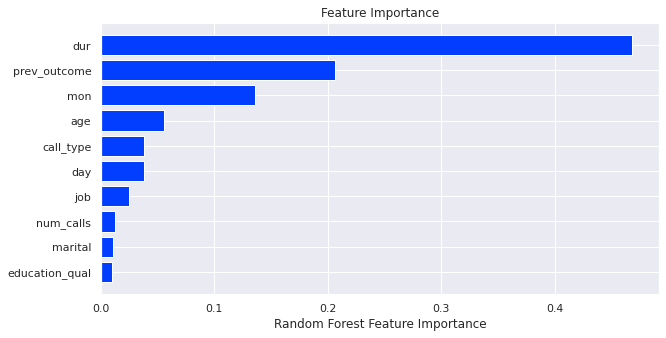

In [76]:
sorted_idx = rf_classifier.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

The Feature Importance given by best machine Learning model that will predict if a client subscribed to the insurance based on


Duration - Longer the call better influncing the clients
Month - In the month of may people subscribed to insurance are more.
Age - Age of the person plays an important role in insurance. Middle age people are targeted more and people who suscribed to insurance also middle age people.
